Net electricity consumption (without PV): 22.2 kWh
Total bill without PV: 5.4350000000000005
Net consumption with PV: 16.7
Wasted (surplus) energy: 0


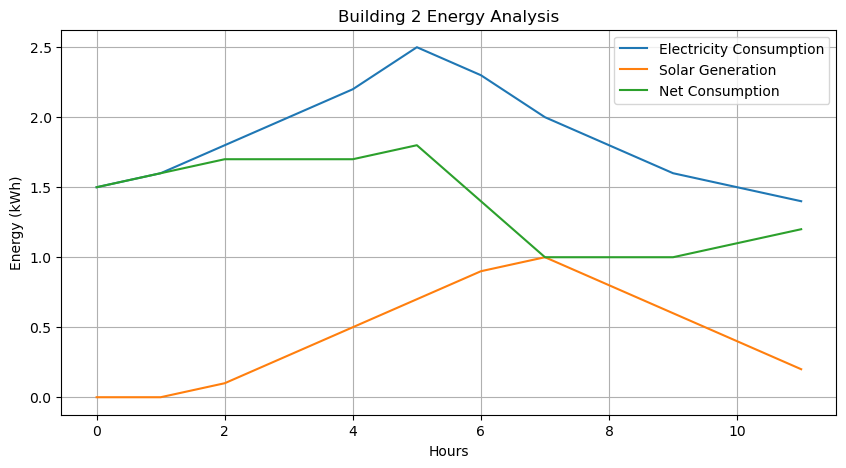

In [3]:
import csv
import matplotlib.pyplot as plt

# -----------------------------
# Load building_2 data
# -----------------------------
non_shiftable_load = []
solar_generation = []

with open('building_2.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        non_shiftable_load.append(float(row['Equipment Electric Power [kWh]']))
        solar_generation.append(float(row['Solar Generation [W/kW]']) / 1000)

# -----------------------------
# Net electricity consumption
# -----------------------------
net_consumption_building = sum(non_shiftable_load)
print("Net electricity consumption (without PV):", net_consumption_building, "kWh")

# -----------------------------
# Net solar generation (1 kW PV)
# -----------------------------
net_solar_generation = []
for gen in solar_generation:
    net_solar_generation.append(gen * 1)

# -----------------------------
# Load price data
# -----------------------------
price = []

with open('prices.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        price.append(float(row[0]))

# -----------------------------
# Bill without PV
# -----------------------------
bill_without_pv = []
for i in range(len(non_shiftable_load)):
    bill_without_pv.append(non_shiftable_load[i] * price[i])

total_bill_without_pv = sum(bill_without_pv)
print("Total bill without PV:", total_bill_without_pv)

# -----------------------------
# Net consumption after PV
# -----------------------------
net_consumption = []
for i in range(len(non_shiftable_load)):
    net_consumption.append(non_shiftable_load[i] - net_solar_generation[i])

# -----------------------------
# Split positive & negative
# -----------------------------
net_electricity_consumption_with_pv = []
wasted_energy = []

for value in net_consumption:
    if value >= 0:
        net_electricity_consumption_with_pv.append(value)
    else:
        wasted_energy.append(value)

print("Net consumption with PV:", sum(net_electricity_consumption_with_pv))
print("Wasted (surplus) energy:", sum(wasted_energy))

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(non_shiftable_load, label="Electricity Consumption")
plt.plot(net_solar_generation, label="Solar Generation")
plt.plot(net_consumption, label="Net Consumption")

plt.xlabel("Hours")
plt.ylabel("Energy (kWh)")
plt.title("Building 2 Energy Analysis")
plt.legend()
plt.grid()
plt.show()